In [1]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
seaborn.set()
import numpy as np
np.set_printoptions(precision=3)
%matplotlib inline

In [2]:
import os
import glob
import re

def load_lengths(idx):
    
    df = pd.DataFrame(index=idx, columns=['duration'])
    
    for jf in idx:
        # get the basename
        match = re.match('SALAMI_(?P<tracknum>\d+).jams', jf)
        
        if not match:
            raise ValueError('Unmatched file: {}'.format(jf))
            
        # find an annotation file
        annotation = '/home/bmcfee/data/SALAMI/data_cleaned/{:s}/parsed/textfile1_functions.lab'.format(match.group('tracknum'))
        
        data = pd.read_csv(annotation, header=None, sep='\t')
        df['duration'][jf] = data[1].max()
    
    return df

In [3]:
import os
import glob
import re

def load_min_lengths(idx):
    
    small_df = pd.Series()
    large_df = pd.Series()
    
    for jf in idx:
        # get the basename
        match = re.match('SALAMI_(?P<tracknum>\d+).jams', jf)
        
        if not match:
            raise ValueError('Unmatched file: {}'.format(jf))
            
        # find an annotation file
        for annotator in [1, 2]:
            a1 = '/home/bmcfee/data/SALAMI/data_cleaned/{:s}/parsed/textfile{:d}_small.lab'.format(match.group('tracknum'), annotator)
            data = pd.read_csv(a1, header=None, sep='\t')
            small_df = pd.concat([small_df, data[1] - data[0]])

            a1 = '/home/bmcfee/data/SALAMI/data_cleaned/{:s}/parsed/textfile{:d}_functions.lab'.format(match.group('tracknum'), annotator)
            data = pd.read_csv(a1, header=None, sep='\t')
            large_df = pd.concat([large_df, data[1] - data[0]])

    return small_df, large_df

In [4]:
df = pd.read_csv('/home/bmcfee/git/hier_eval/notes/searching_w.csv')

In [5]:
df = df.drop('Unnamed: 0', axis=1)

In [6]:
df = df[np.argsort(df.columns)]

In [7]:
df = df.set_index('file')

In [8]:
df = df.sort_index()

In [9]:
lengths = load_lengths(df.index)

In [10]:
small, func = load_min_lengths(df.index)

In [11]:
small.describe(percentiles=[0.5, 0.95])

count    27716.000000
mean         7.912020
std          9.368818
min          0.001000
50%          6.664000
95%         15.686750
max        543.951000
dtype: float64

In [12]:
func.describe()

count    8347.000000
mean       26.271659
std        35.003563
min         0.001000
25%         9.497500
50%        18.235000
75%        30.201500
max       615.315000
dtype: float64

In [13]:
df = df.join(lengths)

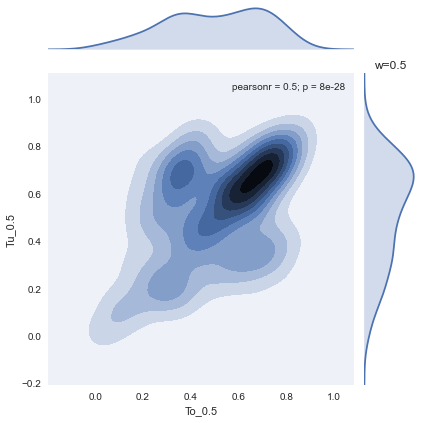

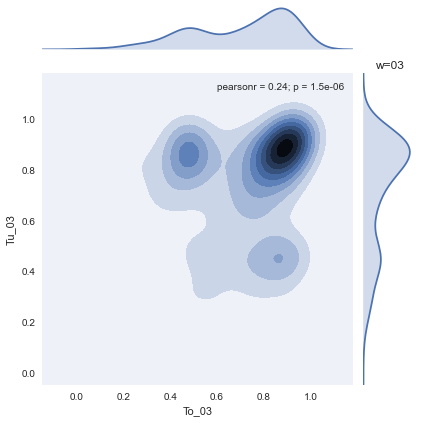

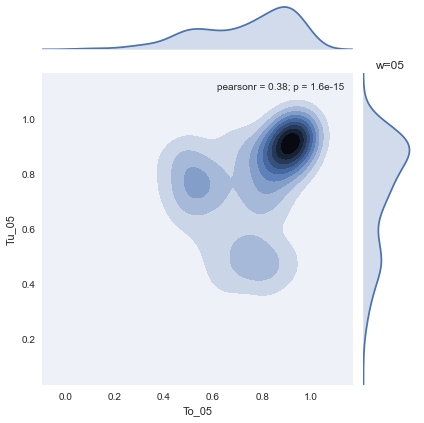

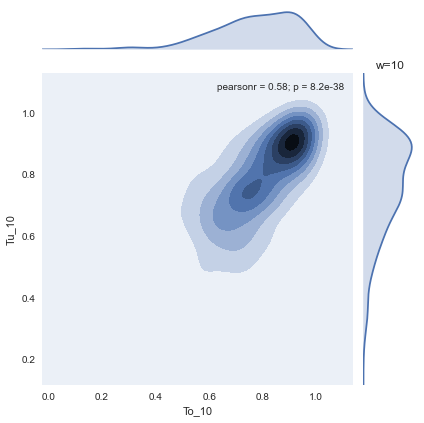

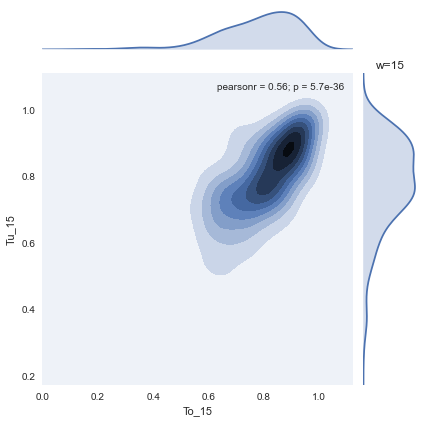

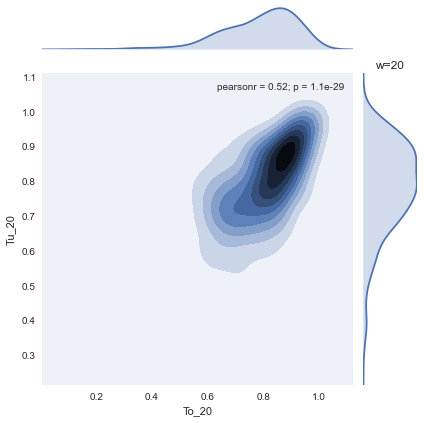

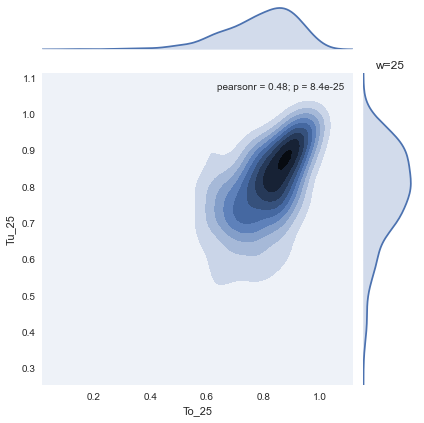

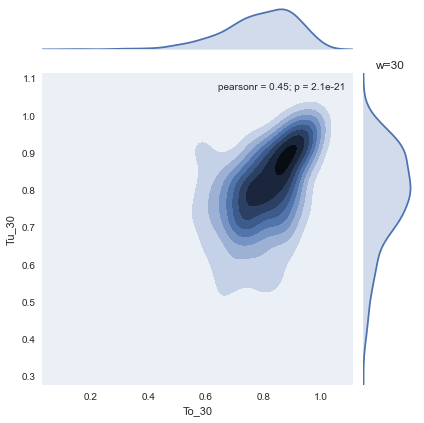

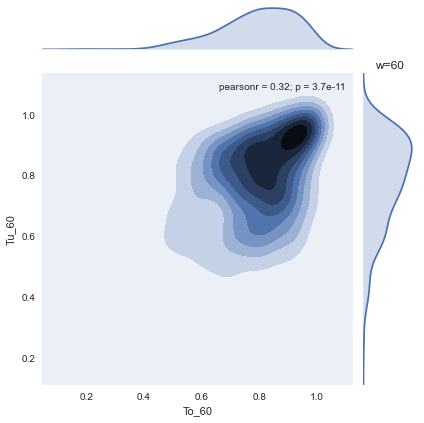

In [14]:
for k in ['0.5', '03', '05', '10', '15', '20', '25', '30', '60']:
    plt.figure()
    seaborn.jointplot(df['To_{}'.format(k)], df['Tu_{}'.format(k)], kind='kde')
    plt.title('w={}'.format(k))
    plt.tight_layout()
    

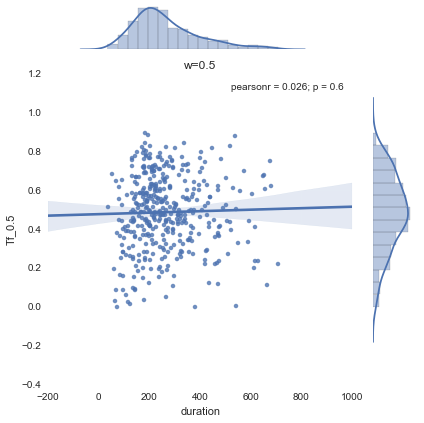

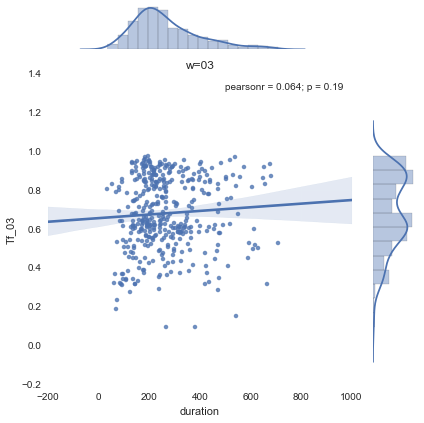

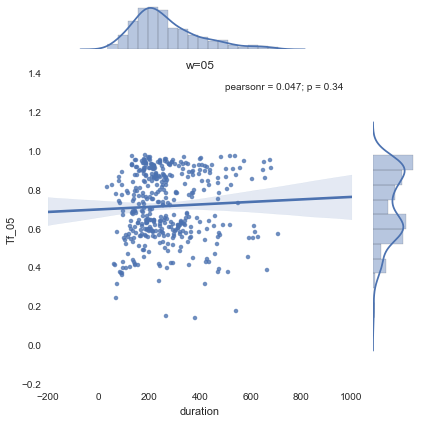

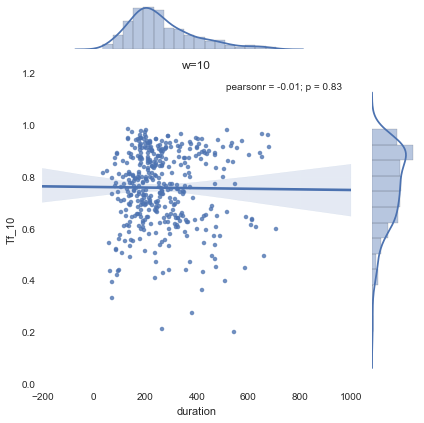

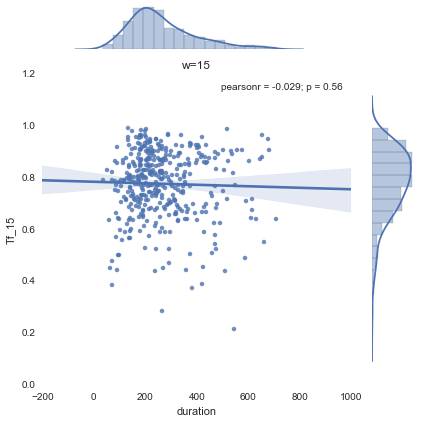

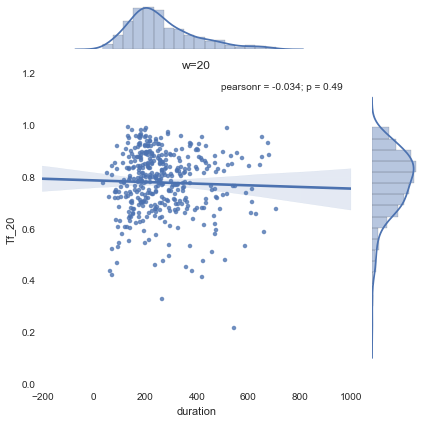

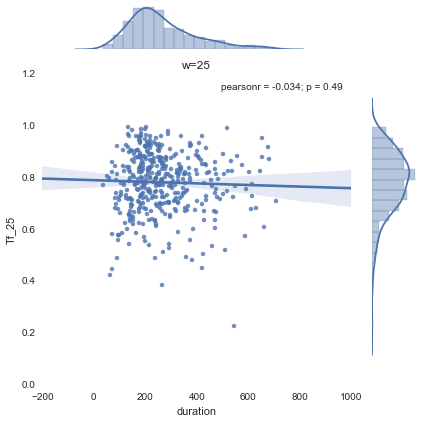

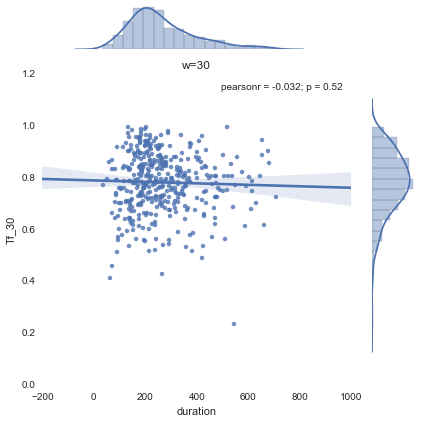

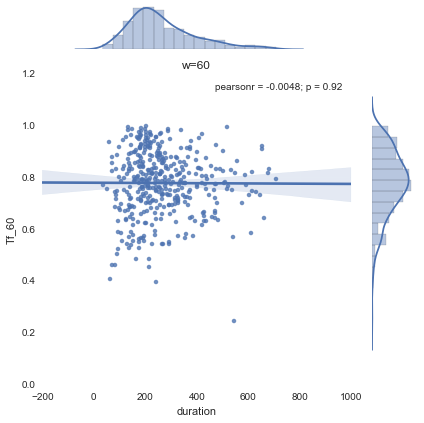

In [15]:
for k in ['0.5', '03', '05', '10', '15', '20', '25', '30', '60']:
    plt.figure()
    seaborn.jointplot(df['duration'], df['Tf_{}'.format(k)], kind='reg')
    plt.title('w={}'.format(k))
    plt.tight_layout()
    

In [16]:
t_f = df[df.columns[:14]]

In [17]:
t_o = df[df.columns[14:28]]
t_u = df[df.columns[28:42]]

In [18]:
cols = t_f.columns

In [19]:
t_f.columns = [x.replace('Tf_', '') for x in cols]

In [20]:
seaborn.set(style='ticks')

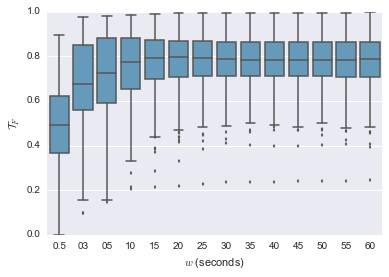

In [21]:
seaborn.set_style('darkgrid')
plt.figure(figsize=(6,4))
seaborn.boxplot(t_f, color=seaborn.color_palette('Blues')[3])
plt.xlabel('$w$ (seconds)')
plt.ylabel('$\mathcal{T}_F$')
#plt.savefig('../figs/tfw.pdf')

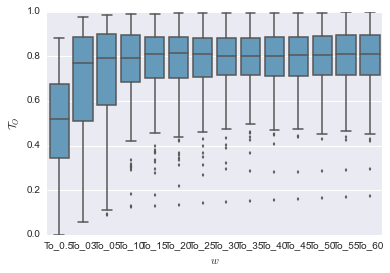

In [233]:
plt.figure(figsize=(6,4))
seaborn.boxplot(t_o, color=seaborn.color_palette('Blues')[3])
plt.xlabel('$w$')
plt.ylabel('$\mathcal{T}_O$')
#plt.savefig('../figs/tfw.pdf')

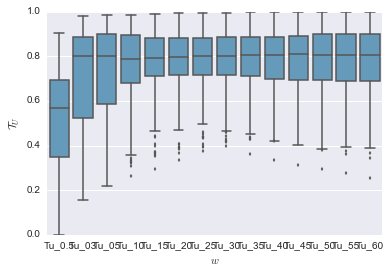

In [234]:
plt.figure(figsize=(6,4))
seaborn.boxplot(t_u, color=seaborn.color_palette('Blues')[3])
plt.xlabel('$w$')
plt.ylabel('$\mathcal{T}_U$')
#plt.savefig('../figs/tfw.pdf')